<h1><center>Machine Learning Algorithms</center></h1>

<h1><center>By Felicia Fryer</center></h1>

Python packages and modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import itertools
import pylab as pl
import scipy.optimize as opt
import time

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.externals.six import StringIO
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score


%matplotlib inline 

Use popular machine learning algorithms: Decision Tree, Support Vector Machines, Neural Networks, k-Nearest Neighbors, and Boosting. I  will use these classification algorithms to build a model from historical data. Then you use the trained machine elarning algorithm to predict the target variable

<div id="Medication dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


Question: Can we predict what drug a patient should take base on their features.

now, read data using pandas dataframe:

In [2]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Data Exploration

In [3]:
# Data Size
my_data.shape

(200, 6)

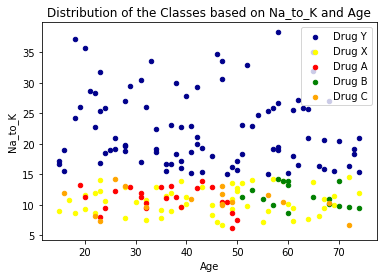

In [4]:
ax = my_data[my_data['Drug'] == 'drugY'][:].plot(kind='scatter', x='Age', y='Na_to_K', color='DarkBlue', label='Drug Y');
my_data[my_data['Drug'] == 'drugX'][:].plot(kind='scatter', x='Age', y='Na_to_K', color='Yellow', label='Drug X', ax=ax);
my_data[my_data['Drug'] == 'drugA'][:].plot(kind='scatter', x='Age', y='Na_to_K', color='Red', label='Drug A', ax=ax);
my_data[my_data['Drug'] == 'drugB'][:].plot(kind='scatter', x='Age', y='Na_to_K', color='Green', label='Drug B', ax=ax);
my_data[my_data['Drug'] == 'drugC'][:].plot(kind='scatter', x='Age', y='Na_to_K', color='Orange', label='Drug C', ax=ax);


plt.title ("Distribution of the Classes based on Na_to_K and Age")
plt.show()

In [5]:
df_p = my_data['Drug'].value_counts()

In [6]:
print (df_p)

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


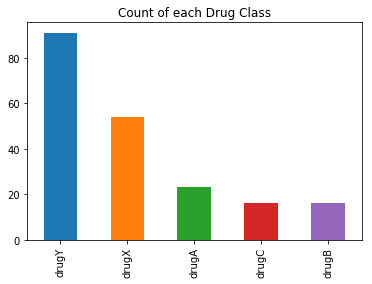

In [7]:
ax = df_p.plot(kind='bar');
plt.title("Count of each Drug Class")
plt.show()

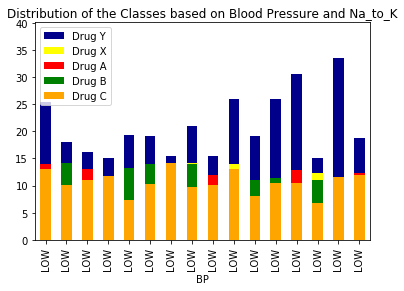

In [8]:
ax = my_data[my_data['Drug'] == 'drugY'][:].plot(kind='bar', x='BP', y='Na_to_K', color='DarkBlue', label='Drug Y');
my_data[my_data['Drug'] == 'drugX'][:].plot(kind='bar', x='BP', y='Na_to_K', color='Yellow', label='Drug X', ax=ax);
my_data[my_data['Drug'] == 'drugA'][:].plot(kind='bar', x='BP', y='Na_to_K', color='Red', label='Drug A', ax=ax);
my_data[my_data['Drug'] == 'drugB'][:].plot(kind='bar', x='BP', y='Na_to_K', color='Green', label='Drug B', ax=ax);
my_data[my_data['Drug'] == 'drugC'][:].plot(kind='bar', x='BP', y='Na_to_K', color='Orange', label='Drug C', ax=ax);


plt.title ("Distribution of the Classes based on Blood Pressure and Na_to_K")
plt.show()

In [9]:
#Frequency count of Drug Column
my_data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.

In [10]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. __pandas.get_dummies()__
Convert categorical variable into dummy/indicator variables.

In [11]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.

In [12]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [13]:
le_Drug = preprocessing.LabelEncoder()
le_Drug.fit(['drugA', 'drugB', 'drugC','drugX', 'drugY'])
y1 = le_Drug.transform(my_data['Drug'])
y1[:10]

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4])

## One Hot Encoding
Use the get_dummies function in numpy to one-hot encode the data.

In [31]:
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [32]:
# Make dummy variables for Sex, BP, Cholesterol, and Drug
one_hot_data = pd.concat([my_data, pd.get_dummies(my_data['Sex'], prefix='Sex'), 
                                   pd.get_dummies(my_data['BP'], prefix='BP'), 
                                   pd.get_dummies(my_data['Cholesterol'], prefix='Cholesterol')],
                                   axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop(['Sex', 'BP', 'Cholesterol'], axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,drugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,drugY,1,0,0,1,0,1,0
5,22,8.607,drugX,1,0,0,0,1,1,0
6,49,16.275,drugY,1,0,0,0,1,1,0
7,41,11.037,drugC,0,1,0,1,0,1,0
8,60,15.171,drugY,0,1,0,0,1,1,0
9,43,19.368,drugY,0,1,0,1,0,0,1


In [33]:
# Drop Drug Column
X1 = one_hot_data.drop(['Drug'], axis=1)

In [34]:
X1[:10]

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
5,22,8.607,1,0,0,0,1,1,0
6,49,16.275,1,0,0,0,1,1,0
7,41,11.037,0,1,0,1,0,1,0
8,60,15.171,0,1,0,0,1,1,0
9,43,19.368,0,1,0,1,0,0,1


In [35]:
scaler = StandardScaler()

# Fit only to X1 - One Hot Encoding data
#scaler.fit(X_train)
scaler.fit(X1)

# Now apply the transformations to the data:
X1 = scaler.transform(X1)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
X1[:10]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


NameError: name 'x1' is not defined

In [36]:
X1[:10]

array([[-1.29159102,  1.28652212,  1.040833  , -1.040833  ,  1.26388393,
        -0.68599434, -0.64686916,  0.97043679, -0.97043679],
       [ 0.16269866, -0.4151454 , -0.96076892,  0.96076892, -0.79121189,
         1.45773797, -0.64686916,  0.97043679, -0.97043679],
       [ 0.16269866, -0.82855818, -0.96076892,  0.96076892, -0.79121189,
         1.45773797, -0.64686916,  0.97043679, -0.97043679],
       [-0.988614  , -1.14996267,  1.040833  , -1.040833  , -0.79121189,
        -0.68599434,  1.54590766,  0.97043679, -0.97043679],
       [ 1.0110343 ,  0.27179427,  1.040833  , -1.040833  , -0.79121189,
         1.45773797, -0.64686916,  0.97043679, -0.97043679],
       [-1.35218642, -1.03769314,  1.040833  , -1.040833  , -0.79121189,
        -0.68599434,  1.54590766,  0.97043679, -0.97043679],
       [ 0.28388946,  0.02643885,  1.040833  , -1.040833  , -0.79121189,
        -0.68599434,  1.54590766,  0.97043679, -0.97043679],
       [-0.20087376, -0.70046821, -0.96076892,  0.96076892, -0

## Cross-Validation for Decision Tree 

In [14]:
# 10-fold cross-validation with Decision Tree (before pruning)
dt = DecisionTreeClassifier(max_depth = 5)
scores = cross_val_score(dt, X, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())


[1.         1.         1.         1.         1.         0.95
 1.         0.94444444 1.         1.        ]
0.02114762923408255
0.9894444444444443


In [15]:
# 10-fold cross-validation with Decision Tree (after pruning)
dt1 = DecisionTreeClassifier(max_depth = 4)
scores = cross_val_score(dt1, X, y1, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         1.         1.         1.         1.         0.95
 1.         0.94444444 1.         1.        ]
0.9894444444444443


In [16]:
# 10-fold cross-validation with Decision Tree (after pruning)
dt2 = DecisionTreeClassifier(max_depth = 3)
scores = cross_val_score(dt2, X, y1, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.91304348 0.90909091 0.90909091 0.9047619  0.9        0.85
 0.94444444 0.77777778 0.94444444 0.94444444]
0.8997098312315703


In [17]:
# 10-fold cross-validation with Decision Tree (after pruning)
dt3 = DecisionTreeClassifier(max_leaf_nodes = 4)
scores = cross_val_score(dt3, X, y1, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.91304348 0.90909091 0.90909091 0.9047619  0.9        0.85
 0.94444444 0.88888889 0.94444444 0.94444444]
0.9108209423426814


## Cross Validation for KNN

In [18]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y1, cv=11, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7251429040515727, 0.6726538940935226, 0.728757890716095, 0.7212431144706687, 0.7111108318925656, 0.6972352338064411, 0.6983838272150965, 0.6359932250412126, 0.6818699489365124, 0.685731038827014, 0.6917735515258735, 0.6778979534397491, 0.6444367938562985, 0.6779701593556083, 0.6317819950946886, 0.6661613927867799, 0.6659221583370191, 0.681748488869232, 0.6577178239716939, 0.6771924798627583, 0.6625025129669093, 0.6750184284240013, 0.6900426199187809, 0.6745627437577902, 0.6838928872984602, 0.6849237063246352, 0.67434629354134, 0.6833527669440983, 0.6849342607856539, 0.6887003605269859]


Text(0.5, 1.0, 'Value of k for kNN vs 11-Fold Cross-Validation Accuracy')

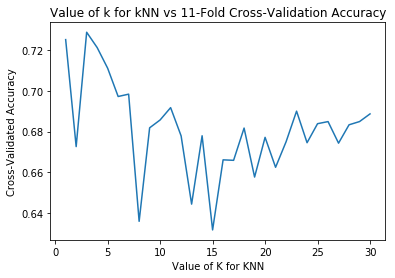

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Value of k for kNN vs 11-Fold Cross-Validation Accuracy')

In [20]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X, y1, cv=11, scoring='accuracy').mean())

0.728757890716095


In [21]:
# 15-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X, y1, cv=10, scoring='accuracy').mean())

0.7283358429010603


In [22]:
# 5-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X, y1, cv=12, scoring='accuracy').mean())

0.7218249361147967


## Cross-validation for SVM

In [23]:
# 11-fold cross-validation with SVM
sv = svm.SVC(kernel='rbf', gamma='auto')
scores = cross_val_score(sv, X, y1, cv=11, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.57142857 0.6        0.7        0.84210526 0.73684211 0.70588235
 0.76470588 0.64705882 0.64705882 0.52941176 0.625     ]
0.08670943448873546
0.6699539624462225


In [24]:
# 11-fold cross-validation with SVM
sv1 = svm.SVC(kernel='linear', gamma='auto')
scores = cross_val_score(sv1, X, y1, cv=11, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         1.         1.         1.         1.         1.
 1.         1.         0.94117647 1.         1.        ]
0.01691057572282556
0.9946524064171123


In [25]:
# 11-fold cross-validation with SVM
sv2 = svm.SVC(kernel='poly', gamma='auto')
scores = cross_val_score(sv2, X, y1, cv=11, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.9047619  1.         0.95       0.94736842 1.         1.
 1.         0.94117647 0.88235294 0.94117647 0.9375    ]
0.03893244993874302
0.9549396552879525


## Cross-Validation for Boosting

In [26]:
# 10-fold cross-validation with Boosting
boost = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.5)
scores = cross_val_score(boost, X, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         1.         1.         1.         1.         0.95
 1.         0.94444444 1.         1.        ]
0.02114762923408255
0.9894444444444443


In [27]:
# 10-fold cross-validation with Boosting
boost1 = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 1.0)
scores = cross_val_score(boost1, X, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         1.         1.         0.95238095 1.         0.95
 1.         0.94444444 1.         1.        ]
0.02346859080443868
0.9846825396825396


In [28]:
# 10-fold cross-validation with Boosting
boost2 = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.25)
scores = cross_val_score(boost2, X, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         1.         1.         1.         1.         0.95
 1.         0.94444444 1.         1.        ]
0.02114762923408255
0.9894444444444443


In [29]:
# 10-fold cross-validation with Boosting
boost3 = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.10)
scores = cross_val_score(boost3, X, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         1.         1.         1.         1.         0.95
 1.         0.94444444 1.         1.        ]
0.02114762923408255
0.9894444444444443


## Cross-Validation for Neural Networks

In [59]:
# 10-fold cross-validation with Neural Networks - 1 Layers
ann1 = MLPClassifier(hidden_layer_sizes=(9),max_iter=1500, solver='lbfgs')
scores = cross_val_score(ann1, X1, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         0.95454545 0.90909091 0.95238095 1.         0.95
 1.         0.94444444 0.94444444 1.        ]
0.030597416514292253
0.9654906204906204


In [60]:
# 10-fold cross-validation with Neural Networks - 2 Layers
ann2 = MLPClassifier(hidden_layer_sizes=(9,9),max_iter=1500, solver='lbfgs')
scores = cross_val_score(ann2, X1, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.91304348 0.90909091 0.95454545 0.80952381 1.         0.95
 1.         0.83333333 1.         1.        ]
0.06686001102468048
0.9369536984754376


In [62]:
# 10-fold cross-validation with Neural Networks - 3 Layers
ann3 = MLPClassifier(hidden_layer_sizes=(9,9,9),max_iter=1500, solver='lbfgs')
scores = cross_val_score(ann3, X1, y1, cv=5, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.88372093 1.         0.95       0.8974359  0.86842105]
0.04855030752186926
0.919915576060007


In [76]:
# 10-fold cross-validation with Neural networks - 4 Layers
ann4 = MLPClassifier(hidden_layer_sizes=(9,9,9,9),max_iter=1500, solver='lbfgs')
scores = cross_val_score(ann4, X1, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.91304348 0.81818182 0.81818182 0.9047619  0.95       0.9
 1.         0.83333333 0.83333333 0.94444444]
0.060189442360086554
0.8915280130497522


In [74]:
# 10-fold cross-validation with Neural Networks - 3 Layers
ann5 = MLPClassifier(hidden_layer_sizes=(9),max_iter=3000, solver='lbfgs')
scores = cross_val_score(ann5, X1, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.95652174 0.95454545 1.         0.95238095 1.         0.95
 1.         0.94444444 1.         1.        ]
0.024390302471546065
0.9757892590501285


In [77]:
#from sklearn.linear_model import LogisticRegression
# 10-fold cross-validation with SoftMax 2750 Iterations to Converge
ann3 = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter=2000)
scores = cross_val_score(ann3, X1, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.95652174 0.90909091 0.95454545 0.95238095 0.95       0.95
 1.         0.94444444 0.88888889 1.        ]
0.0324104928930077
0.9505872388481084


In [78]:
#from sklearn.linear_model import LogisticRegression
# 10-fold cross-validation with SoftMax 2750 Iterations to Converge
ann4 = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter=2000)
scores = cross_val_score(ann4, X, y1, cv=10, scoring='accuracy')
print(scores)
print(np.std(scores))
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         1.         1.         0.95238095 1.         0.95
 1.         0.88888889 1.         0.94444444]
0.036352412002542855
0.9735714285714285


# Learning Curve

In [81]:
train_sizes=np.linspace(0.1, 1.0, 10)

# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)


In [86]:
#Learning Curve Function
#The intention is to use mean squared error(MSE) metric, we use a proxy, negative MSE
#CV represents the k-fold cross-validation

def learning_curves(estimator, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes = train_sizes, cv = cv, error_score = np.nan)

    train_scores_mean = train_scores.mean(axis = 1)
    ymax = train_scores.max()
    ylim = ymax * 1.5

    validation_scores_mean = validation_scores.mean(axis = 1)
    plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Cross-validation Score')
    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training Set Size', fontsize = 14)
    title = 'Learning Curve for a ' + str(estimator).split('(')[0] + ' Model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,ylim)
    

In [83]:
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
#cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#train_sizes, train_scores, validation_scores = learning_curve(svm.SVC(kernel = 'rbf', gamma = 0.001), X_train, y_train, train_sizes = np.linspace(0.1,1.0,10), cv = cv)

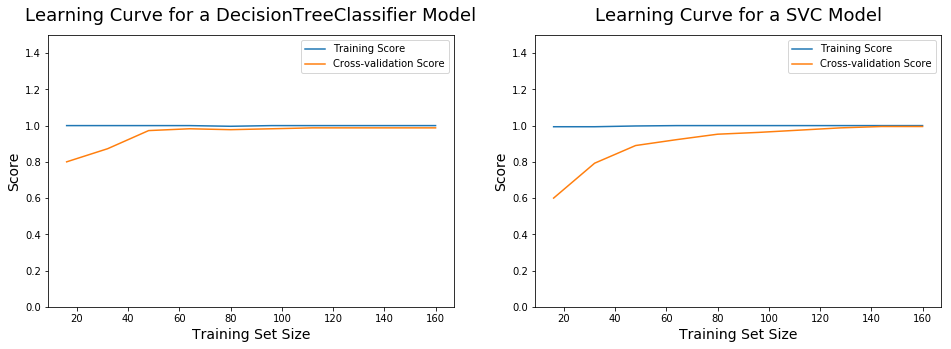

In [87]:
#Plotting the Learning Curves for Decision Tree(Pruning), Neural Networks, Boosting, Support Vector Machines, and k-Nearest Neighbors
plt.figure(figsize = (16,5))

for model,i in [(DecisionTreeClassifier(criterion = 'gini', max_depth = 4), 1),(svm.SVC(kernel='linear', gamma = 'auto'), 2)]:
    plt.subplot(1,2,i)
    learning_curves(model, X, y1, train_sizes, cv)

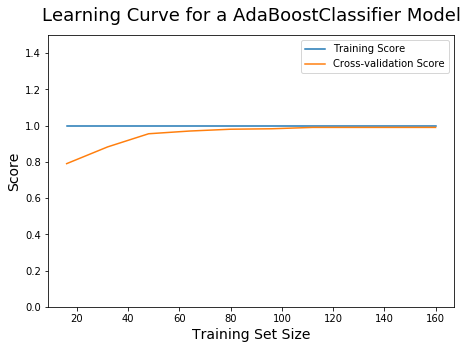

In [88]:
plt.figure(figsize = (16,5))
for model,i in [(AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.5), 1)]:
    plt.subplot(1,2,i)
    
    learning_curves(model, X, y1, train_sizes, cv)

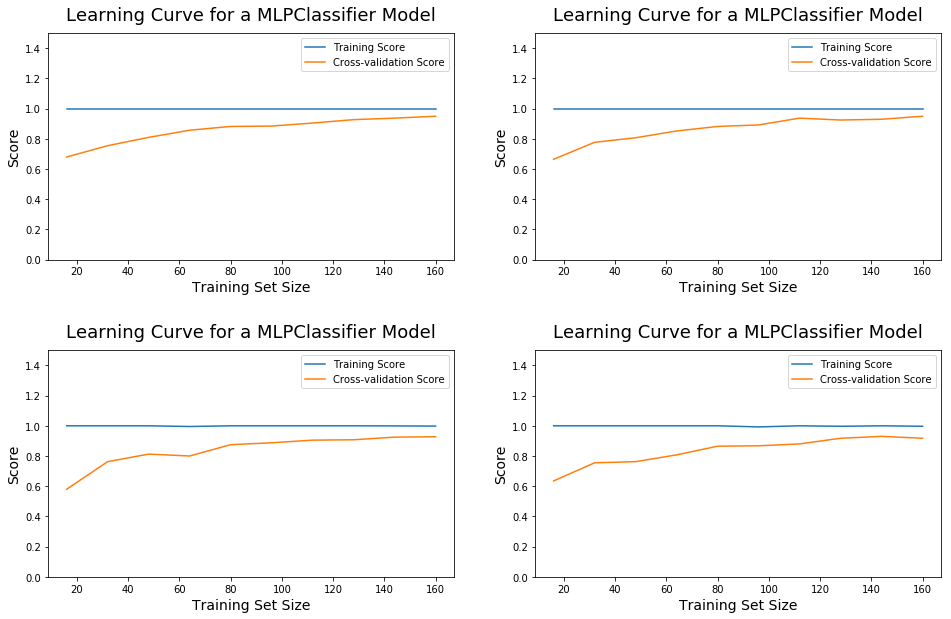

In [89]:
plt.figure(figsize = (16,10))
for model,i in [(MLPClassifier(hidden_layer_sizes=(9),max_iter=3000, solver='lbfgs'), 1), 
                (MLPClassifier(hidden_layer_sizes=(9),max_iter=1500, solver='lbfgs'), 2),
                (MLPClassifier(hidden_layer_sizes=(9,9),max_iter=1500, solver='lbfgs'), 3),
                (MLPClassifier(hidden_layer_sizes=(9,9),max_iter=3000, solver='lbfgs'), 4)]:
    plt.subplot(2,2,i)
    plt.subplots_adjust(hspace = 0.4)
    learning_curves(model, X1, y1, train_sizes, cv)

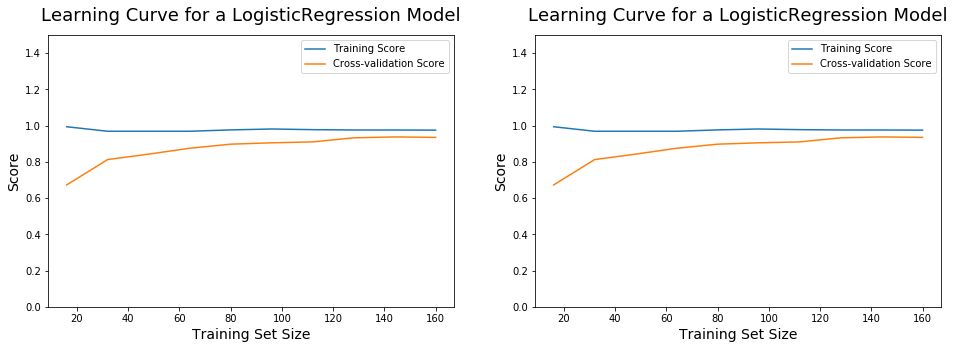

In [91]:
plt.figure(figsize = (16,5))
for model,i in [(LogisticRegression(multi_class='multinomial',max_iter=2000, solver='lbfgs'), 1), 
                (LogisticRegression(multi_class='multinomial',max_iter=3000, solver='lbfgs'), 2)]:
    plt.subplot(1,2,i)
    plt.subplots_adjust(hspace = 0.4)
    learning_curves(model, X1, y1, train_sizes, cv)

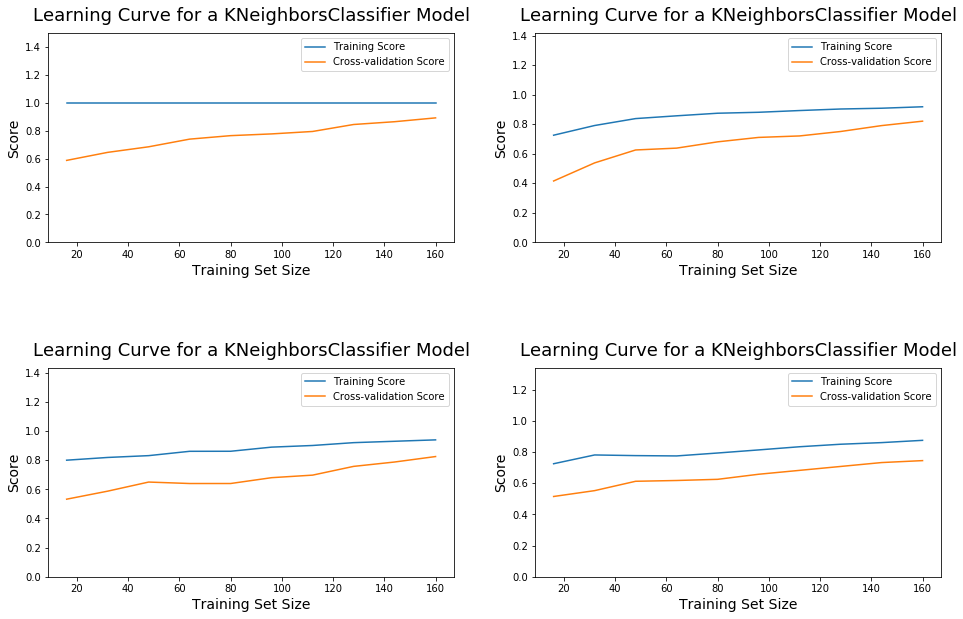

In [93]:
plt.figure(figsize = (16,10))
for model,i in [(KNeighborsClassifier(n_neighbors = 1), 1), 
                (KNeighborsClassifier(n_neighbors = 2), 2),
                (KNeighborsClassifier(n_neighbors = 3), 3),
                (KNeighborsClassifier(n_neighbors = 4), 4)]:
    plt.subplot(2,2,i)
    plt.subplots_adjust(hspace = 0.6)
    learning_curves(model, X1, y1, train_sizes, cv)  

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [103]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [104]:
print ('Train set:', X_trainset.shape,  y_trainset.shape)

Train set: (140, 5) (140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [105]:
print ('Test set:',X_testset.shape, y_testset.shape)

Test set: (60, 5) (60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [131]:
start_time = time.time()
drugTree = DecisionTreeClassifier(max_depth = 4)
#drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = None)
drugTree.fit(X_trainset,y_trainset)
print("---%s seconds ---" % (time.time() - start_time))

---0.0014660358428955078 seconds ---


In [132]:
drugTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [108]:
predTree = drugTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [109]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [110]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [111]:
print("Decision Tree before pruning F1_Score:", f1_score(y_testset, predTree, average='weighted'))


Decision Tree before pruning F1_Score: 0.9833152664859981


In [112]:
print("Decision Tree before pruning Jaccard Score:", jaccard_similarity_score(y_testset, predTree))

Decision Tree before pruning Jaccard Score: 0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [113]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

   micro avg       0.98      0.98      0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


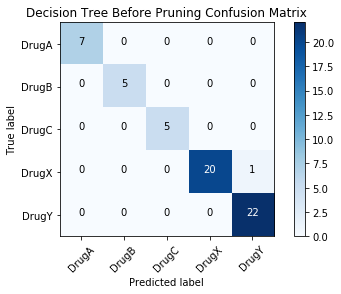

In [114]:
# Compute confusion matrix
dt_cnf_matrix = confusion_matrix(y_testset, predTree, labels=['drugA','drugB','drugC','drugX','drugY'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt_cnf_matrix, classes=['DrugA','DrugB','DrugC', 'DrugX', 'DrugY'],normalize= False,  title='Decision Tree Before Pruning Confusion Matrix')

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

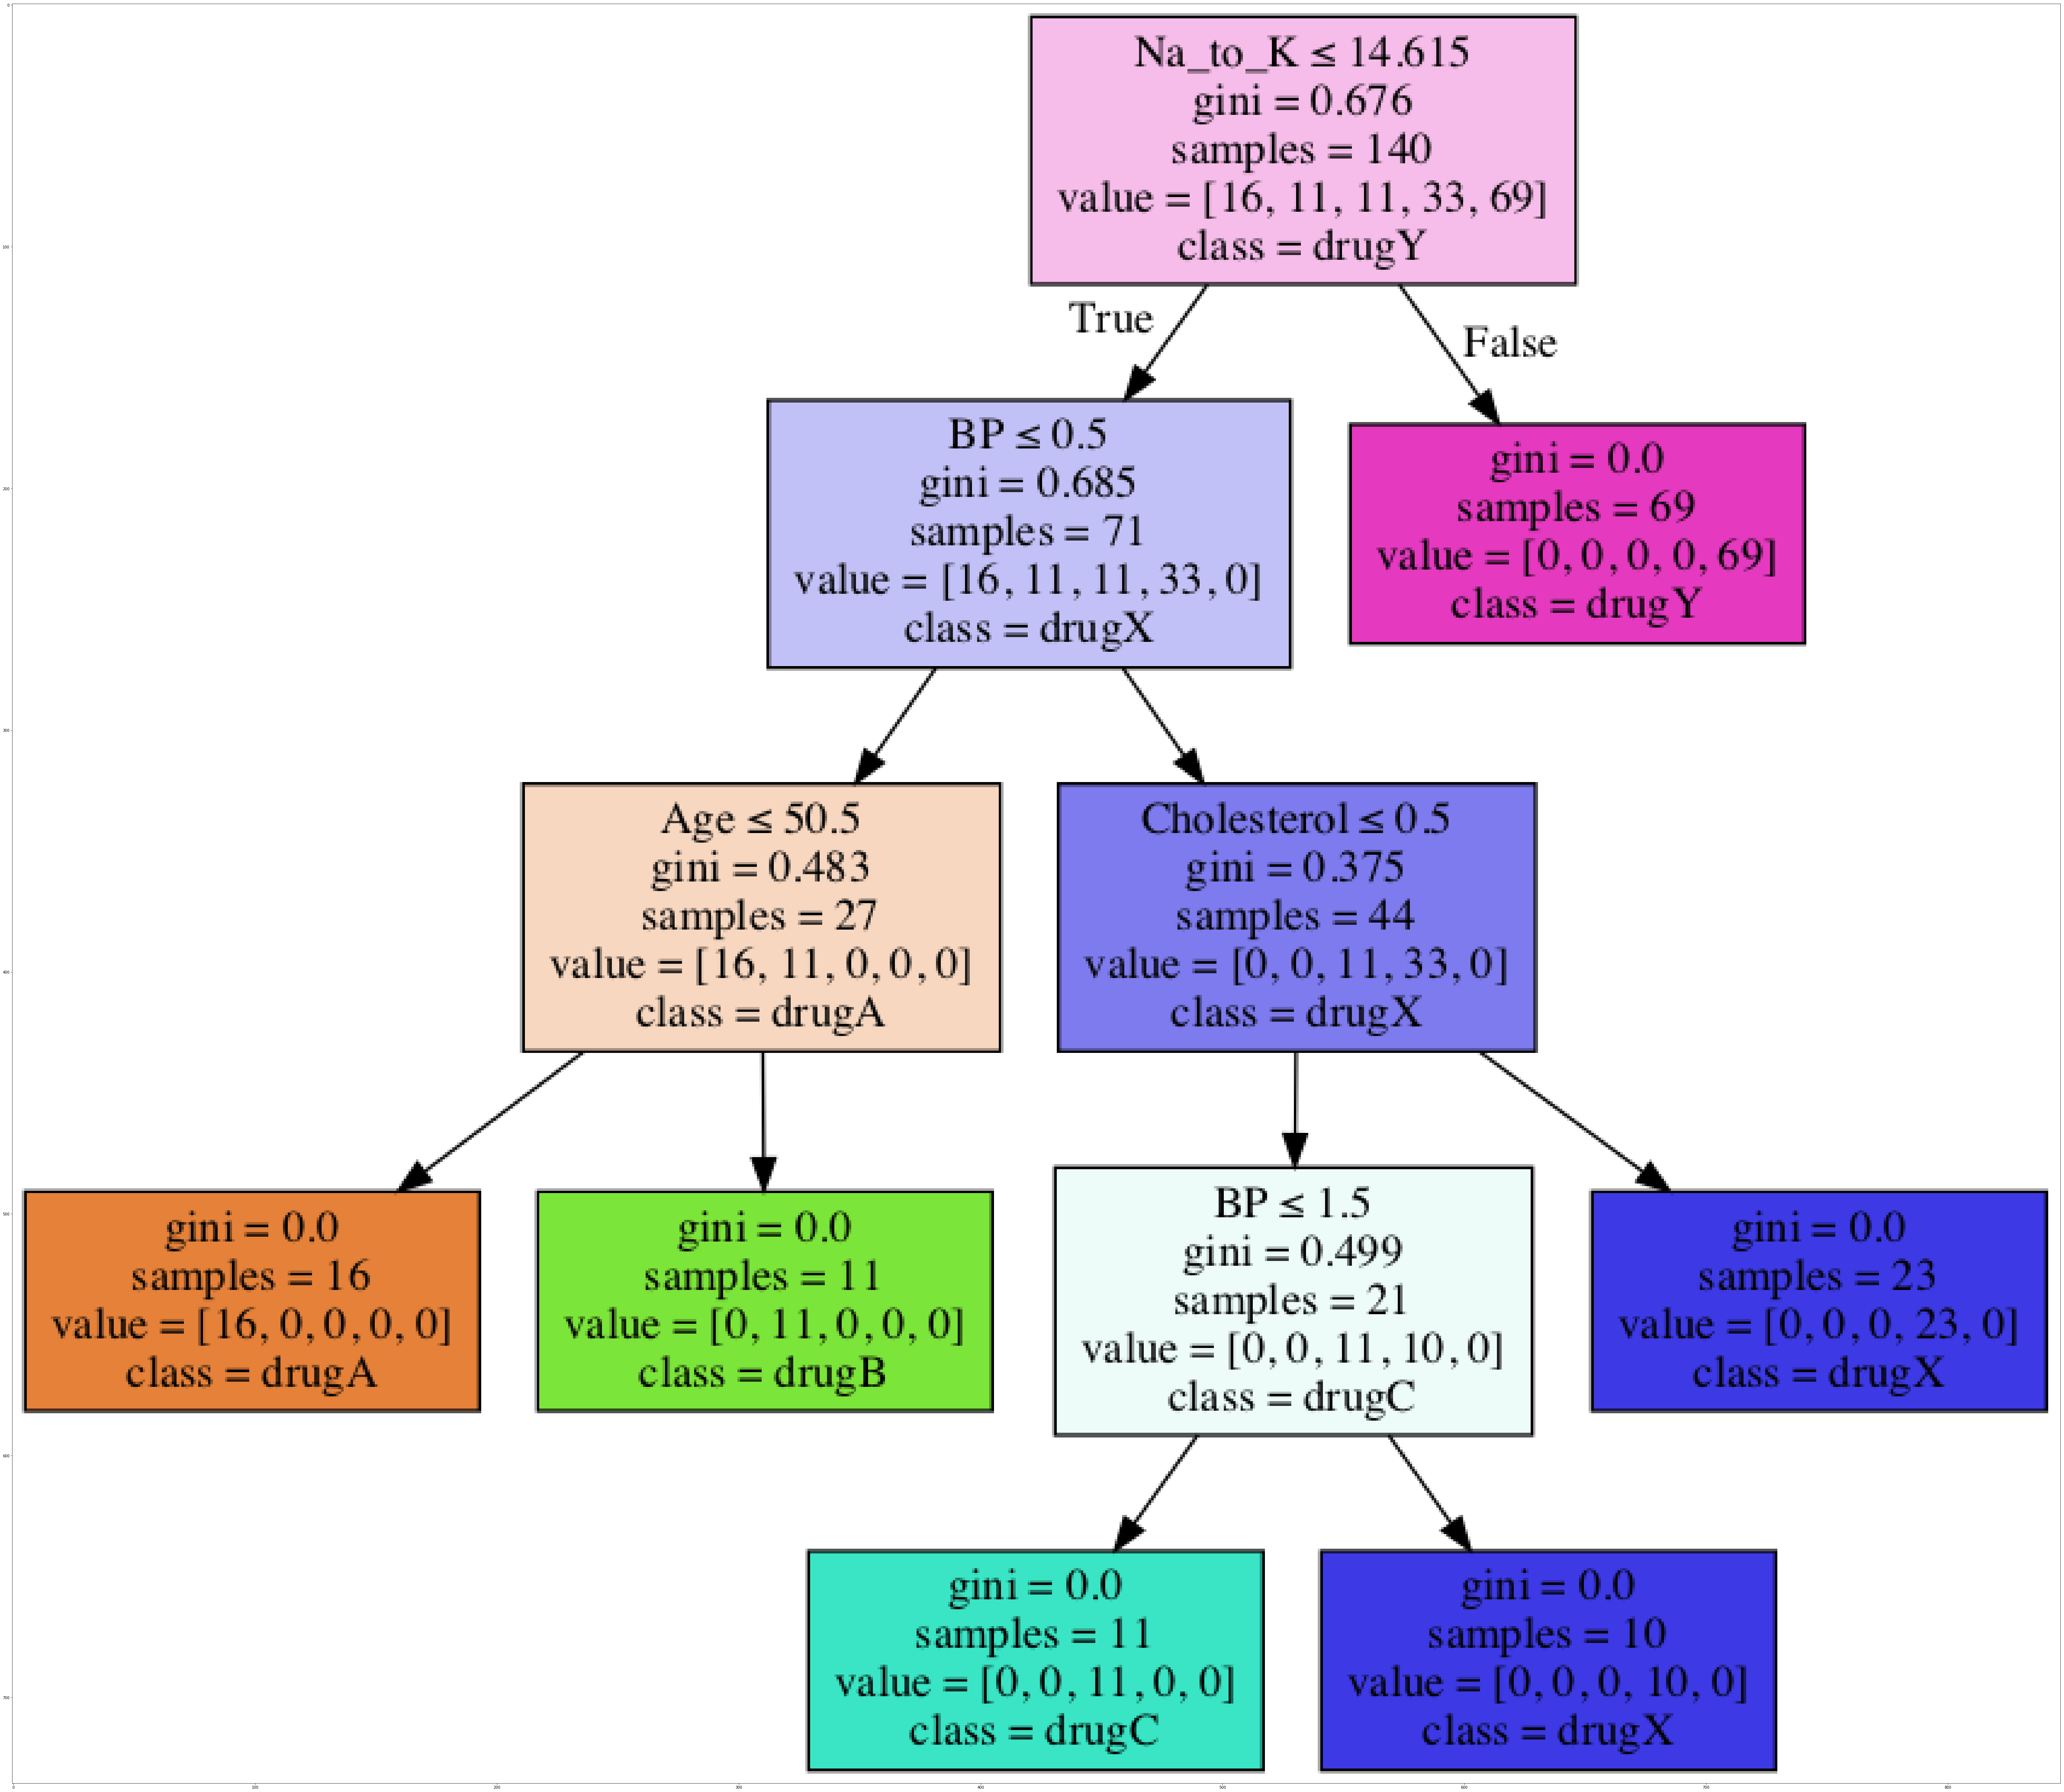

In [125]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<hr>

<div id="pruning">
    <h2>Pruning</h2>
    Lets prune the decision tree to avoid overfitting
</div>

We can avoid overfitting by changing the parameters.

Pruning Parameters:
<ul>
    <li> <b>max_leaf_nodes - reduce the number of leaf nodes</b> </li>
    <li> <b>min_samples_leaf - restrict the size of sample leaf</b> </li>
    <li> <b>max_depth - reduce the depth of the tree to build a generalized tree</b> </li>
</ul>

In [133]:
#We will rebuild a new tree by using above data and see how it works by tweeking the parameteres
start_time = time.time()
drugTree2 = DecisionTreeClassifier(criterion = "gini", max_depth = 3)
drugTree2.fit(X_trainset,y_trainset)
print("---%s seconds ---" % (time.time() - start_time))

---0.0015671253204345703 seconds ---


In [134]:
drugTree2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [128]:
#Predict Prune Tree
predTree2 = drugTree2.predict(X_testset)

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our prune model.
</div>

In [129]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree2))

DecisionTrees's Accuracy:  0.8166666666666667


In [130]:
print("Decision Tree after pruning F1_Score:", f1_score(y_testset, predTree2, average = 'weighted'))


Decision Tree after pruning F1_Score: 0.8259916367980883


In [131]:
print("Decision Tree after pruning Jaccard Score:", jaccard_similarity_score(y_testset, predTree2))

Decision Tree after pruning Jaccard Score: 0.8166666666666667


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       0.33      1.00      0.50         5
       drugX       1.00      0.48      0.65        21
       drugY       0.96      1.00      0.98        22

   micro avg       0.82      0.82      0.82        60
   macro avg       0.86      0.90      0.82        60
weighted avg       0.93      0.82      0.83        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0 10 10  1]
 [ 0  0  0  0 22]]


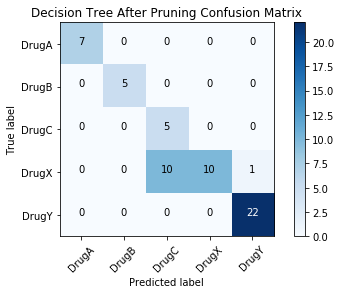

In [132]:
# Compute confusion matrix
dtp_cnf_matrix = confusion_matrix(y_testset, predTree2, labels=['drugA','drugB','drugC','drugX','drugY'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dtp_cnf_matrix, classes=['DrugA','DrugB','DrugC', 'DrugX', 'DrugY'],normalize= False,  title='Decision Tree After Pruning Confusion Matrix')

In [35]:
print (np.unique(y_trainset))

['drugA' 'drugB' 'drugC' 'drugX' 'drugY']


<h3>Visualize the Prune Tree</h3>

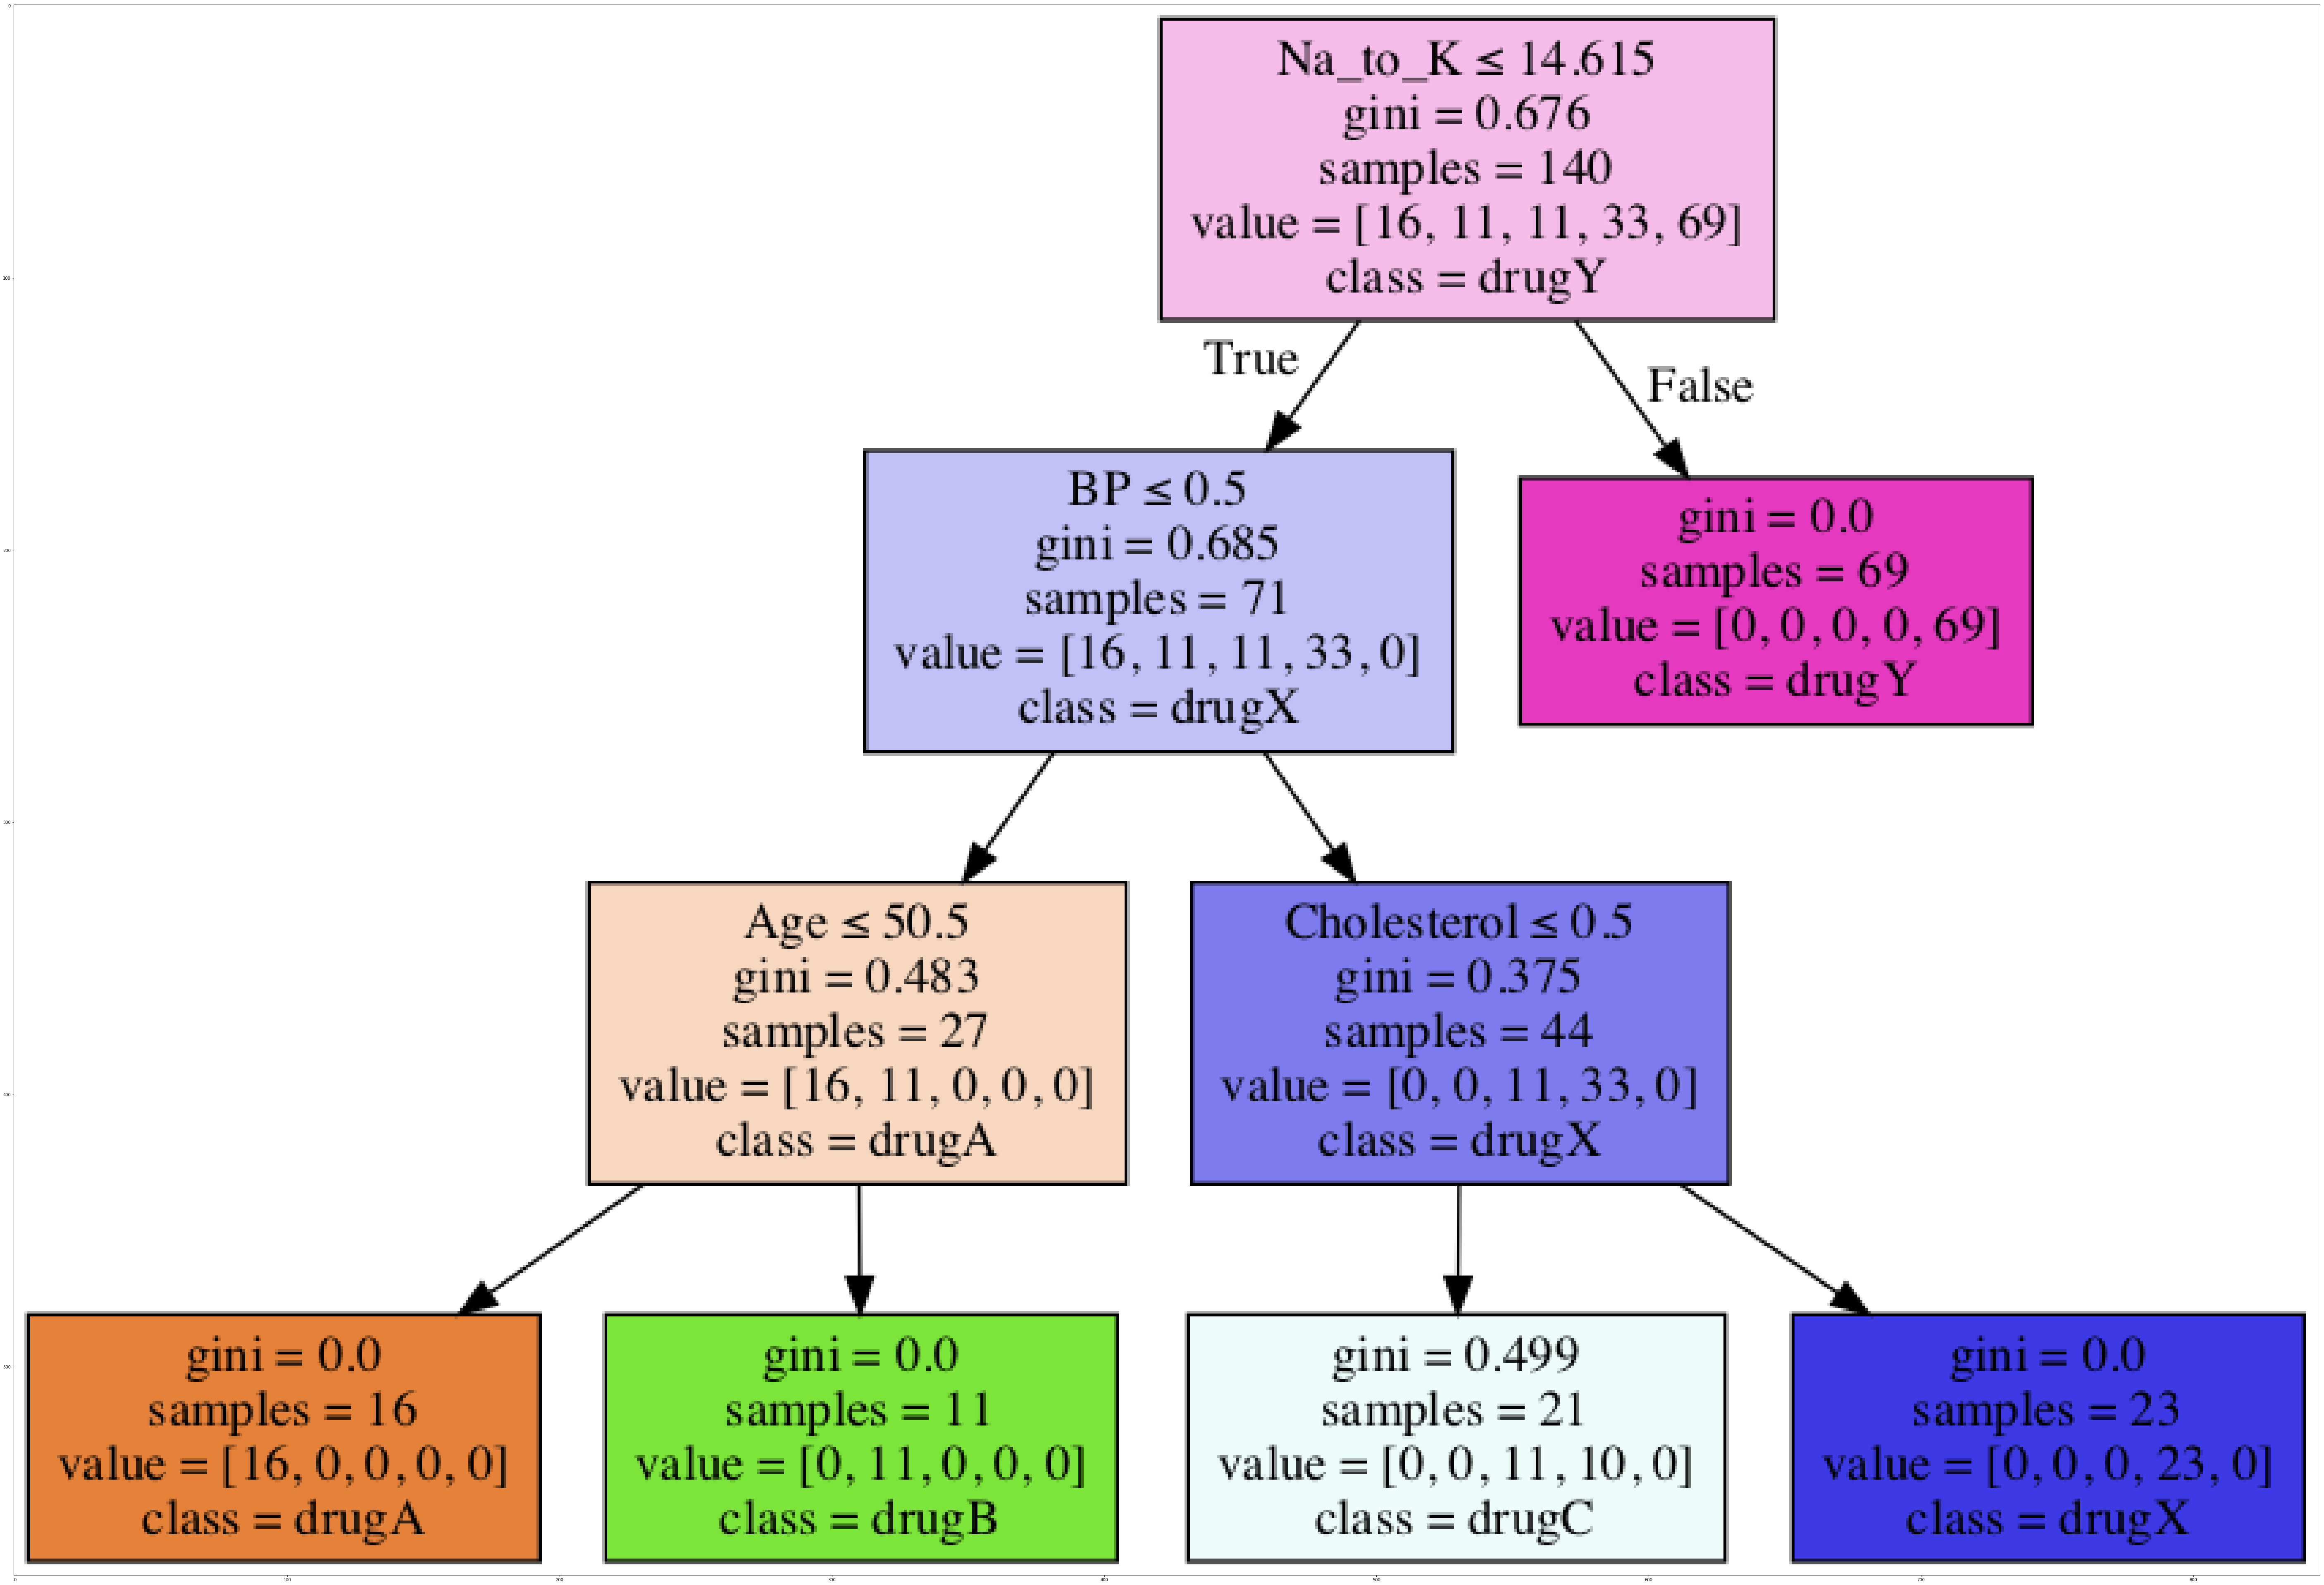

In [133]:
plt.clf
dot_data = StringIO()
filename = "drugtree2.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree2,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')



<h1><center>Neural Networks</center></h1>

### Splitting the dataset into training and test

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=3)

print (X_train[0:5])
print (y_train[0:5])

[[26 0 0 1 19.160999999999998]
 [41 0 2 1 22.905]
 [28 0 2 0 19.675]
 [19 0 0 0 13.312999999999999]
 [50 1 2 1 15.79]]
[4 4 4 0 4]


In [121]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)
#scaler.fit(X)

#Now apply the transformations to the data:
#X_N = scaler.transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [122]:
print (X_train[0:5])
print (y_train[0:5])

[[-1.07 -1.07 -1.06  0.96  0.28]
 [-0.14 -1.07  1.48  0.96  0.75]
 [-0.95 -1.07  1.48 -1.04  0.34]
 [-1.5  -1.07 -1.06 -1.04 -0.46]
 [ 0.41  0.93  1.48  0.96 -0.15]]
[4 4 4 0 4]


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [179]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(9,9),max_iter=500, solver='lbfgs')
mlp.fit(X_train,y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.21000909805297852 seconds ---


In [158]:
start_time = time.time()
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter = 2750)
softmax_reg.fit(X_train, y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.43126606941223145 seconds ---


In [170]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [187]:
softmax_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2750, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [180]:
predictions = mlp.predict(X_test)

In [188]:
predictions_soft = softmax_reg.predict(X_test)

In [181]:
print(confusion_matrix(y_test,predictions))

[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  3  1  0]
 [ 0  0  0 20  1]
 [ 1  0  1  1 19]]


In [189]:
print (confusion_matrix(y_test, predictions_soft))

[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 1  0  4  0  0]
 [ 0  0  0 20  1]
 [ 1  0  0  0 21]]


In [182]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.83      1.00      0.91         5
           2       0.75      0.60      0.67         5
           3       0.91      0.95      0.93        21
           4       0.95      0.86      0.90        22

   micro avg       0.90      0.90      0.90        60
   macro avg       0.86      0.88      0.87        60
weighted avg       0.90      0.90      0.90        60



In [190]:
print(classification_report(y_test, predictions_soft))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       1.00      0.95      0.98        21
           4       0.95      0.95      0.95        22

   micro avg       0.95      0.95      0.95        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.96      0.95      0.95        60



In [183]:
print("ANN Accuracy: ", metrics.accuracy_score(y_test, predictions))

ANN Accuracy:  0.9


In [191]:
print("Softmax Accuracy: ", metrics.accuracy_score(y_test, predictions_soft))

Softmax Accuracy:  0.95


              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.83      1.00      0.91         5
           2       0.75      0.60      0.67         5
           3       0.91      0.95      0.93        21
           4       0.95      0.86      0.90        22

   micro avg       0.90      0.90      0.90        60
   macro avg       0.86      0.88      0.87        60
weighted avg       0.90      0.90      0.90        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  3  1  0]
 [ 0  0  0 20  1]
 [ 1  0  1  1 19]]


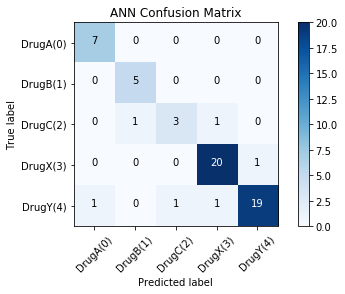

In [184]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['DrugA(0)','DrugB(1)','DrugC(2)', 'DrugX(3)', 'DrugY(4)'],normalize= False,  title='ANN Confusion Matrix')

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5
           3       1.00      0.95      0.98        21
           4       0.95      0.95      0.95        22

   micro avg       0.95      0.95      0.95        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.96      0.95      0.95        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 1  0  4  0  0]
 [ 0  0  0 20  1]
 [ 1  0  0  0 21]]


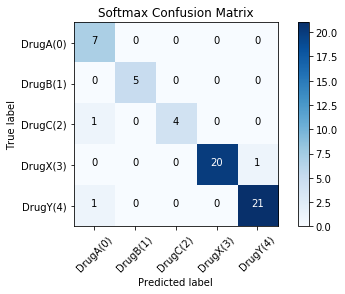

In [192]:
# Compute confusion matrix
cnf_matrix1 = confusion_matrix(y_test, predictions_soft, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions_soft))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix1, classes=['DrugA(0)','DrugB(1)','DrugC(2)', 'DrugX(3)', 'DrugY(4)'],normalize= False,  title='Softmax Confusion Matrix')

In [185]:
f1_score(y_test, predictions, average='weighted') 

0.8975294472968892

In [186]:
jaccard_similarity_score(y_test, predictions)

0.9

In [193]:
jaccard_similarity_score(y_test, predictions_soft)

0.95



<h1><center>Support Vector Machine</center></h1>



The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [194]:
#Different Kernels
clf_radial = svm.SVC(kernel='rbf', gamma = 'auto')
clf_radial.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
start_time = time.time()
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train) 
print("---%s seconds ---" % (time.time() - start_time))

---0.0015158653259277344 seconds ---


In [196]:
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train, y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [197]:
clf_sig = svm.SVC(kernel='sigmoid')
clf_sig.fit(X_train, y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [198]:
yhat_radial = clf_radial.predict(X_test)

In [199]:
f1_score(y_test, yhat_radial, average='weighted') 

0.447711038961039

In [200]:
yhat_linear = clf_linear.predict(X_test)

In [201]:
f1_score(y_test, yhat_linear, average='weighted') 

0.9670189701897018

In [202]:
yhat_poly = clf_poly.predict(X_test)

In [203]:
f1_score(y_test, yhat_poly, average='weighted') 

0.889469608981804

In [204]:
yhat_sig = clf_sig.predict(X_test)

In [205]:
f1_score(y_test, yhat_sig, average='weighted') 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.19674796747967477

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.95      0.98        21
           4       0.95      0.95      0.95        22

   micro avg       0.97      0.97      0.97        60
   macro avg       0.97      0.98      0.97        60
weighted avg       0.97      0.97      0.97        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 1  0  0  0 21]]


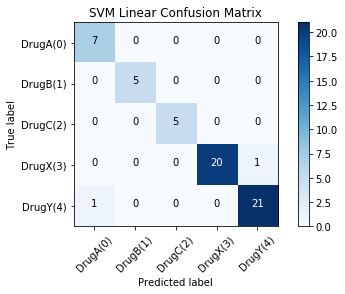

In [206]:
# Compute confusion matrix
cnf_matrix_linear = confusion_matrix(y_test, yhat_linear, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_linear, classes=['DrugA(0)','DrugB(1)','DrugC(2)', 'DrugX(3)', 'DrugY(4)'],normalize= False,  title='SVM Linear Confusion Matrix')

In [207]:
jaccard_similarity_score(y_test, yhat_linear)

0.9666666666666667

<h1><center>k-Nearest Neighbors</center></h1>

#### Different K values
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [123]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78, 0.73, 0.7 , 0.63, 0.68, 0.62, 0.65, 0.63, 0.7 ])

#### Plot  model accuracy  for Different number of Neighbors 

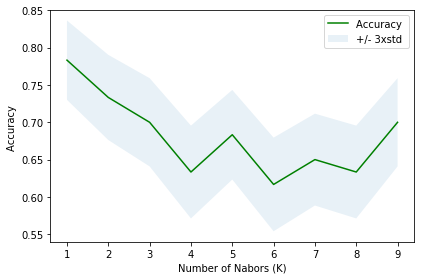

In [124]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [125]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7833333333333333 with k= 1


### Training

k = 1 has the best accuracy value

In [136]:
k = 1
start_time = time.time()
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print("---%s seconds ---" % (time.time() - start_time))
print (neigh)

---0.0011529922485351562 seconds ---
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


In [127]:
yhat_k1 = neigh.predict(X_test)

In [128]:
f1_score(y_test, yhat_k1, average='weighted') 

0.7716666666666667

In [129]:
jaccard_similarity_score(y_test, yhat_k1)

0.7833333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.56      1.00      0.71         5
           2       0.71      1.00      0.83         5
           3       0.79      0.90      0.84        21
           4       0.85      0.50      0.63        22

   micro avg       0.78      0.78      0.78        60
   macro avg       0.78      0.88      0.80        60
weighted avg       0.81      0.78      0.77        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 19  2]
 [ 0  4  2  5 11]]


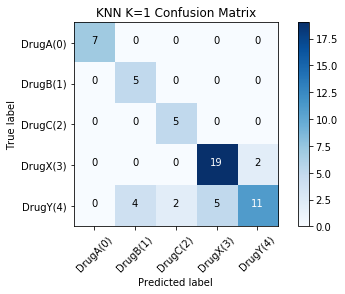

In [130]:
# Compute confusion matrix
cnf_matrix_k1 = confusion_matrix(y_test, yhat_k1, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_k1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_k1, classes=['DrugA(0)','DrugB(1)','DrugC(2)','DrugX(3)','DrugY(4)'],normalize= False,  title='KNN K=1 Confusion Matrix')

<h1><center>Boosting</center></h1>

In [137]:
start_time = time.time()
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 5), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
print("---%s seconds ---" % (time.time() - start_time))

---0.18396282196044922 seconds ---


In [138]:
ada_clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [86]:
yhat_ada = ada_clf.predict(X_test)

In [87]:
f1_score(y_test, yhat_ada, average='weighted') 

0.9833152664859981

In [88]:
jaccard_similarity_score(y_test, yhat_ada)

0.9833333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      0.95      0.98        21
           4       0.96      1.00      0.98        22

   micro avg       0.98      0.98      0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


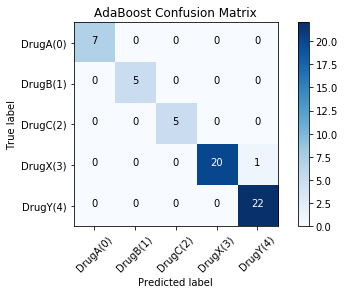

In [89]:
# Compute confusion matrix
cnf_matrix_ada = confusion_matrix(y_test, yhat_ada, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_ada))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_ada, classes=['DrugA(0)','DrugB(1)','DrugC(2)','DrugX(3)','DrugY(4)'],normalize= False,  title='AdaBoost Confusion Matrix')

# The Second DataSet

<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Identifier|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>

In [90]:
cancer_data = pd.read_csv("cancer.csv", delimiter=",")
cancer_data[0:5]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

In [91]:
cancer_data.shape

(699, 11)

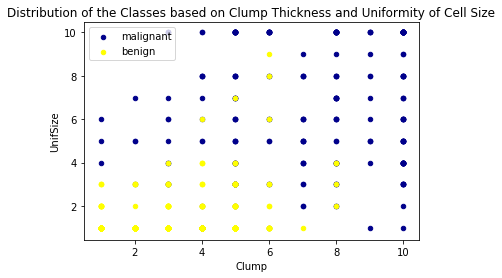

In [92]:
ax = cancer_data[cancer_data['Class'] == 4][:].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cancer_data[cancer_data['Class'] == 2][:].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.title ("Distribution of the Classes based on Clump Thickness and Uniformity of Cell Size")
plt.show()

## Data Preprocessing and Selection

In [93]:
cancer_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows:

In [94]:
cancer_data = cancer_data[pd.to_numeric(cancer_data['BareNuc'], errors='coerce').notnull()]
cancer_data['BareNuc'] = cancer_data['BareNuc'].astype('int')
cancer_data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [95]:
feature_df = cancer_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [96]:
cancer_data['Class'] = cancer_data['Class'].astype('int')
y = np.asarray(cancer_data['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## Train/Test Dataset

In [97]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [98]:
cancerTree = DecisionTreeClassifier()
cancerTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [99]:
cancerTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [100]:
predTreeCancer = cancerTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [101]:
print (predTreeCancer [0:5])
print (y_test [0:5])


[2 4 2 4 2]
[2 4 2 4 2]


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [104]:
print("DecisionTrees's before pruning Accuracy: ", metrics.accuracy_score(y_test, predTreeCancer))

DecisionTrees's before pruning Accuracy:  0.948905109489051


In [105]:
print("Decision Tree before pruning F1_Score:", f1_score(y_test, predTreeCancer, average='weighted'))

Decision Tree before pruning F1_Score: 0.9487715518830105


In [106]:
print("Decision Tree before pruning Jaccard Score:", jaccard_similarity_score(y_test, predTreeCancer))

Decision Tree before pruning Jaccard Score: 0.948905109489051


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


              precision    recall  f1-score   support

           2       0.96      0.97      0.96        90
           4       0.93      0.91      0.92        47

   micro avg       0.95      0.95      0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137

Confusion matrix, without normalization
[[87  3]
 [ 4 43]]


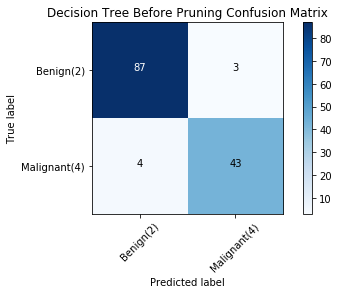

In [110]:
# Compute confusion matrix
dt_cancer_matrix = confusion_matrix(y_test, predTreeCancer, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTreeCancer))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dt_cancer_matrix, classes=['Benign(2)', 'Malignant(4)'],normalize= False,  title='Decision Tree Before Pruning Confusion Matrix')

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

<Figure size 432x288 with 0 Axes>

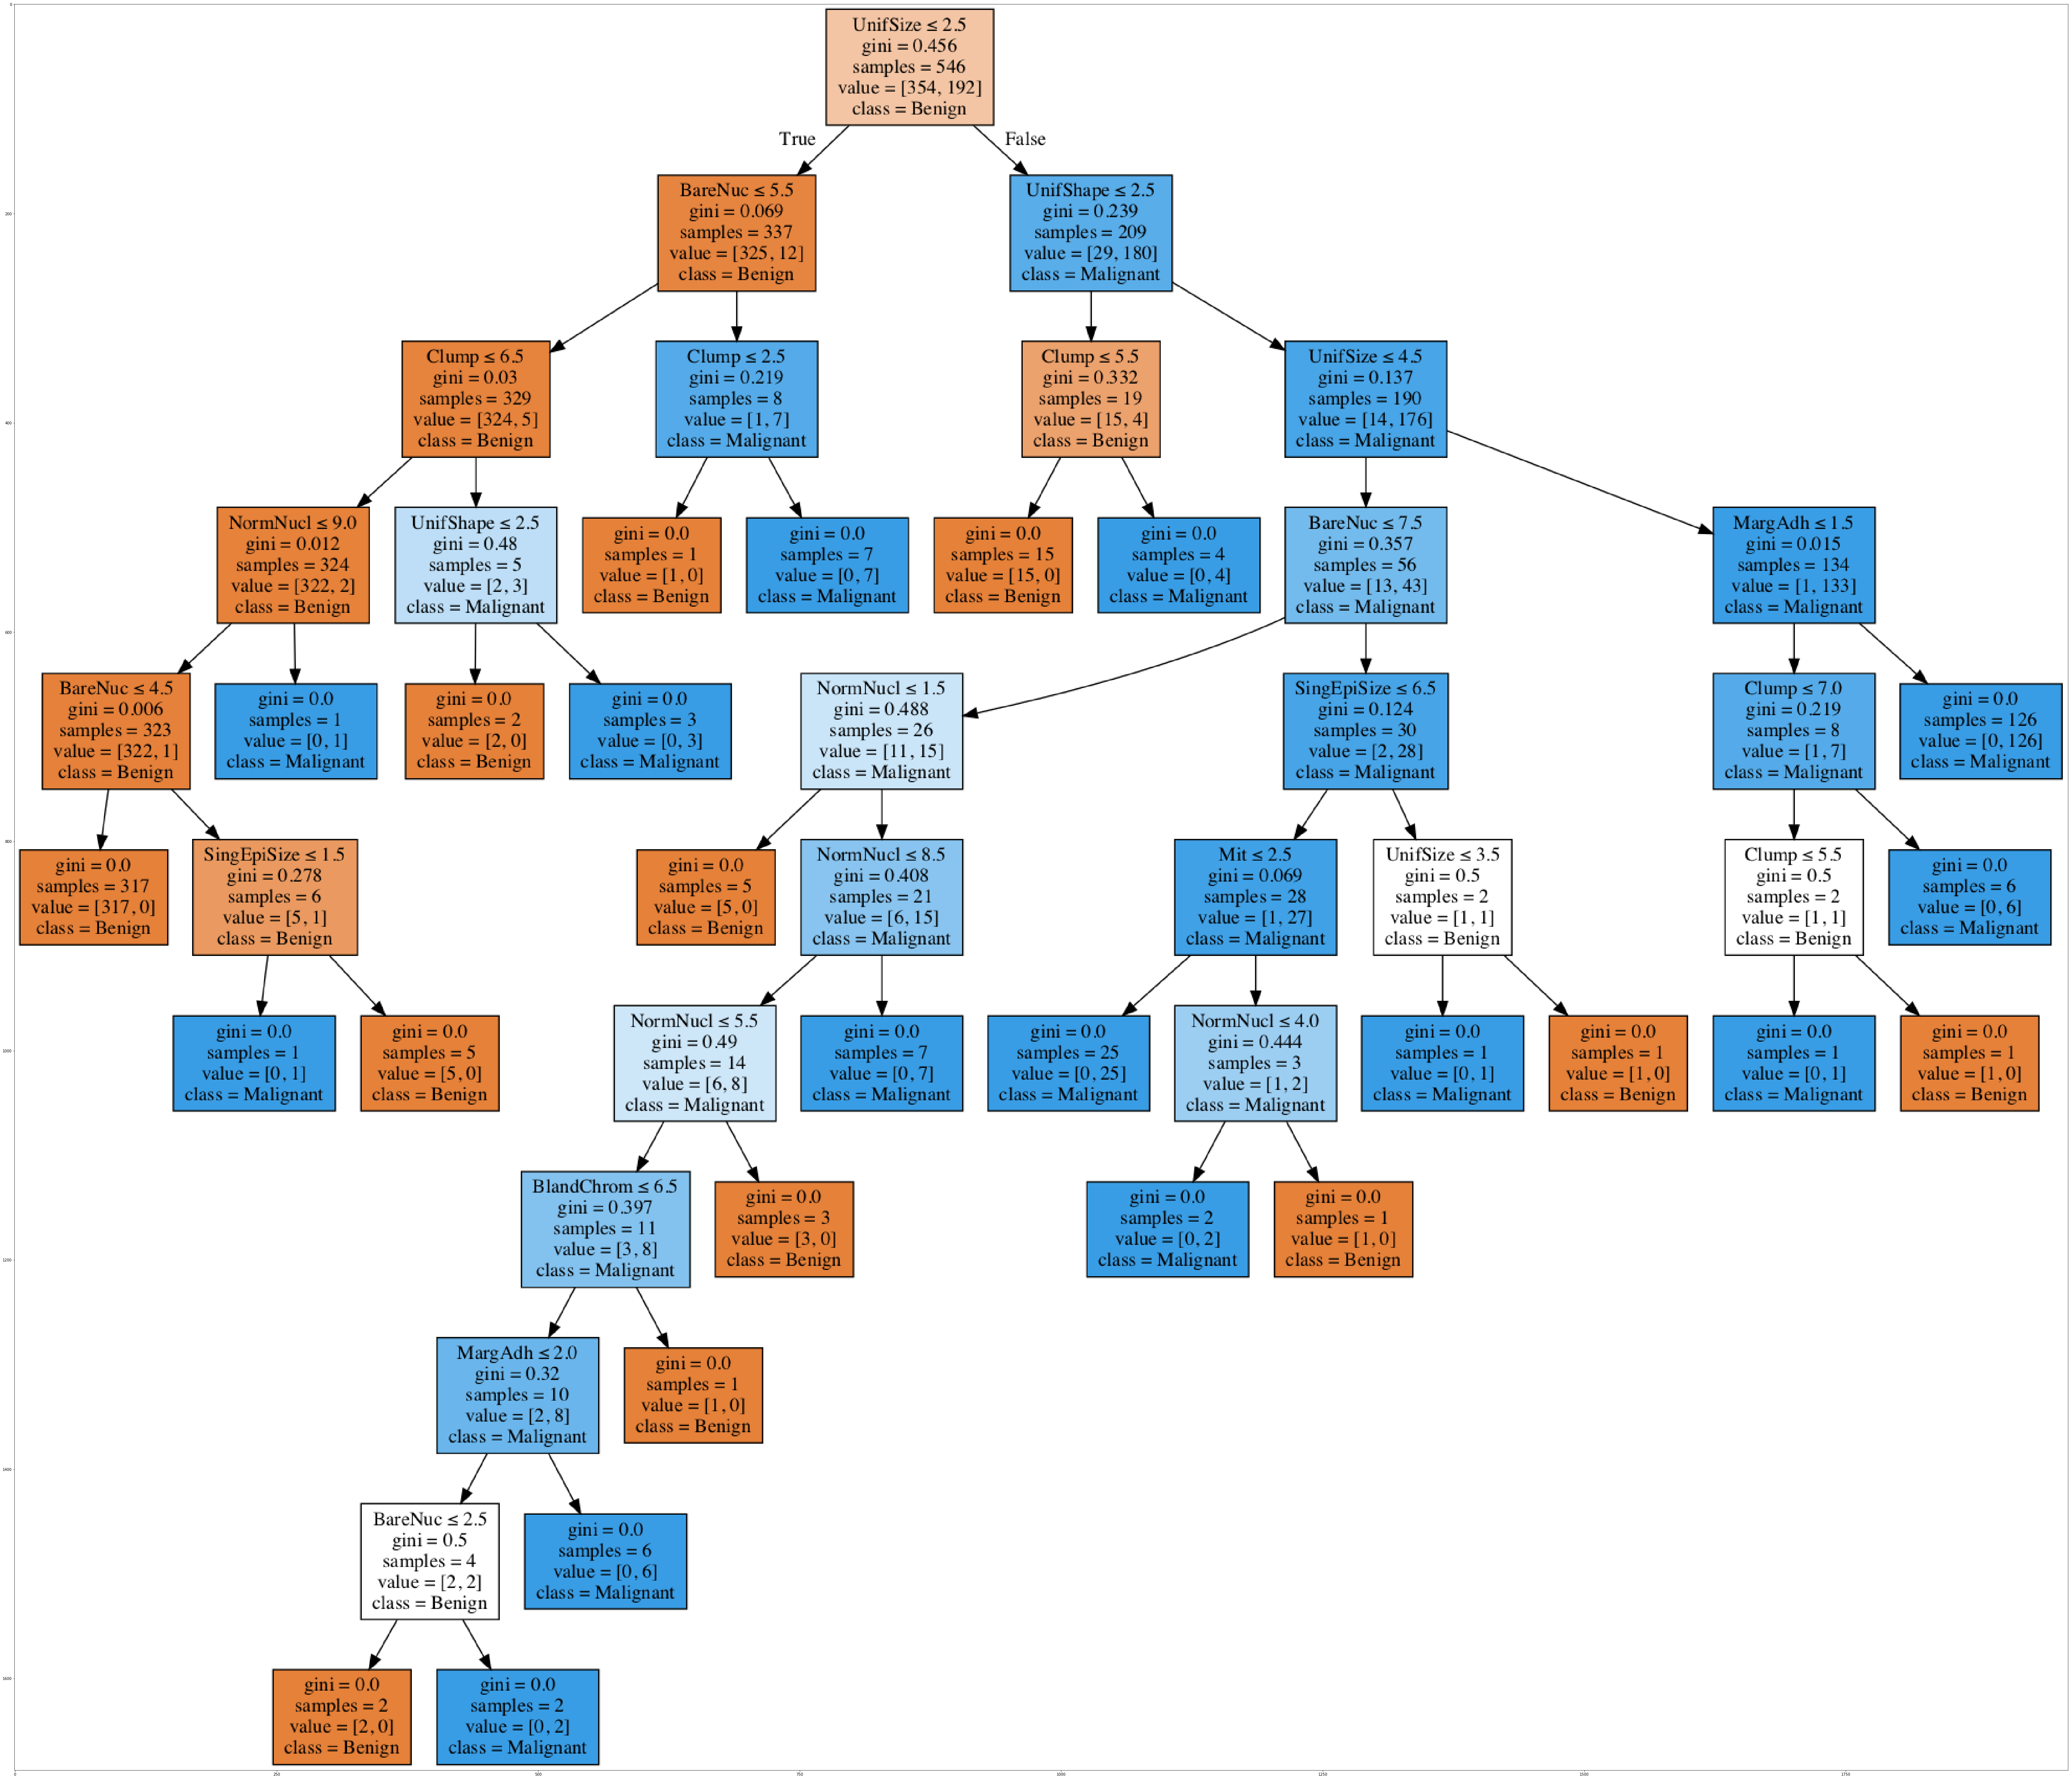

In [117]:
plt.clf()
dot_data = StringIO()
filename = "cancertreebp.png"
featureNames = cancer_data.columns[1:10]
#targetNames = cancer_data["Class"].unique().tolist()
targetNames = [2,4]
out=tree.export_graphviz(cancerTree,feature_names=featureNames, out_file=dot_data, class_names= ['Benign','Malignant'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<hr>

<div id="pruning">
    <h2>Pruning</h2>
    Lets prune the decision tree to avoid overfitting
</div>

We can avoid overfitting by changing the parameters.

Pruning Parameters:
<ul>
    <li> <b>max_leaf_nodes - reduce the number of leaf nodes</b> </li>
    <li> <b>min_samples_leaf - restrict the size of sample leaf</b> </li>
    <li> <b>max_depth - reduce the depth of the tree to build a generalized tree</b> </li>
</ul>

In [30]:
#We will rebuild a new tree by using above data and see how it works by tweeking the parameteres
drugTree2 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes = 4)
drugTree2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b> to the new prune decision tree

In [31]:
drugTree2.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
#Predict Prune Tree
predTree2 = drugTree2.predict(X_testset)

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our prune model.
</div>

In [33]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree2))

DecisionTrees's Accuracy:  0.9


In [38]:
print("Decision Tree after pruning F1_Score:", f1_score(y_testset, predTree2, average = 'weighted'))


Decision Tree after pruning F1_Score: 0.862866344605475


In [39]:
print("Decision Tree after pruning Jaccard Score:", jaccard_similarity_score(y_testset, predTree2))

Decision Tree after pruning Jaccard Score: 0.9


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       0.00      0.00      0.00         5
       drugX       0.80      0.95      0.87        21
       drugY       0.96      1.00      0.98        22

   micro avg       0.90      0.90      0.90        60
   macro avg       0.75      0.79      0.77        60
weighted avg       0.83      0.90      0.86        60

Confusion matrix, without normalization
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


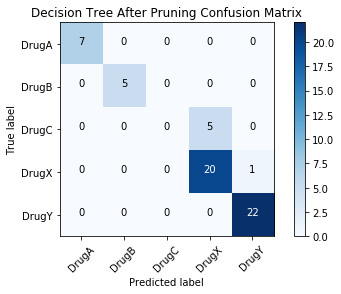

In [43]:
# Compute confusion matrix
dtp_cnf_matrix = confusion_matrix(y_testset, predTree2, labels=['drugA','drugB','drugC','drugX','drugY'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, predTree2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(dtp_cnf_matrix, classes=['DrugA','DrugB','DrugC', 'DrugX', 'DrugY'],normalize= False,  title='Decision Tree After Pruning Confusion Matrix')

<h3>Visualize the Prune Tree</h3>

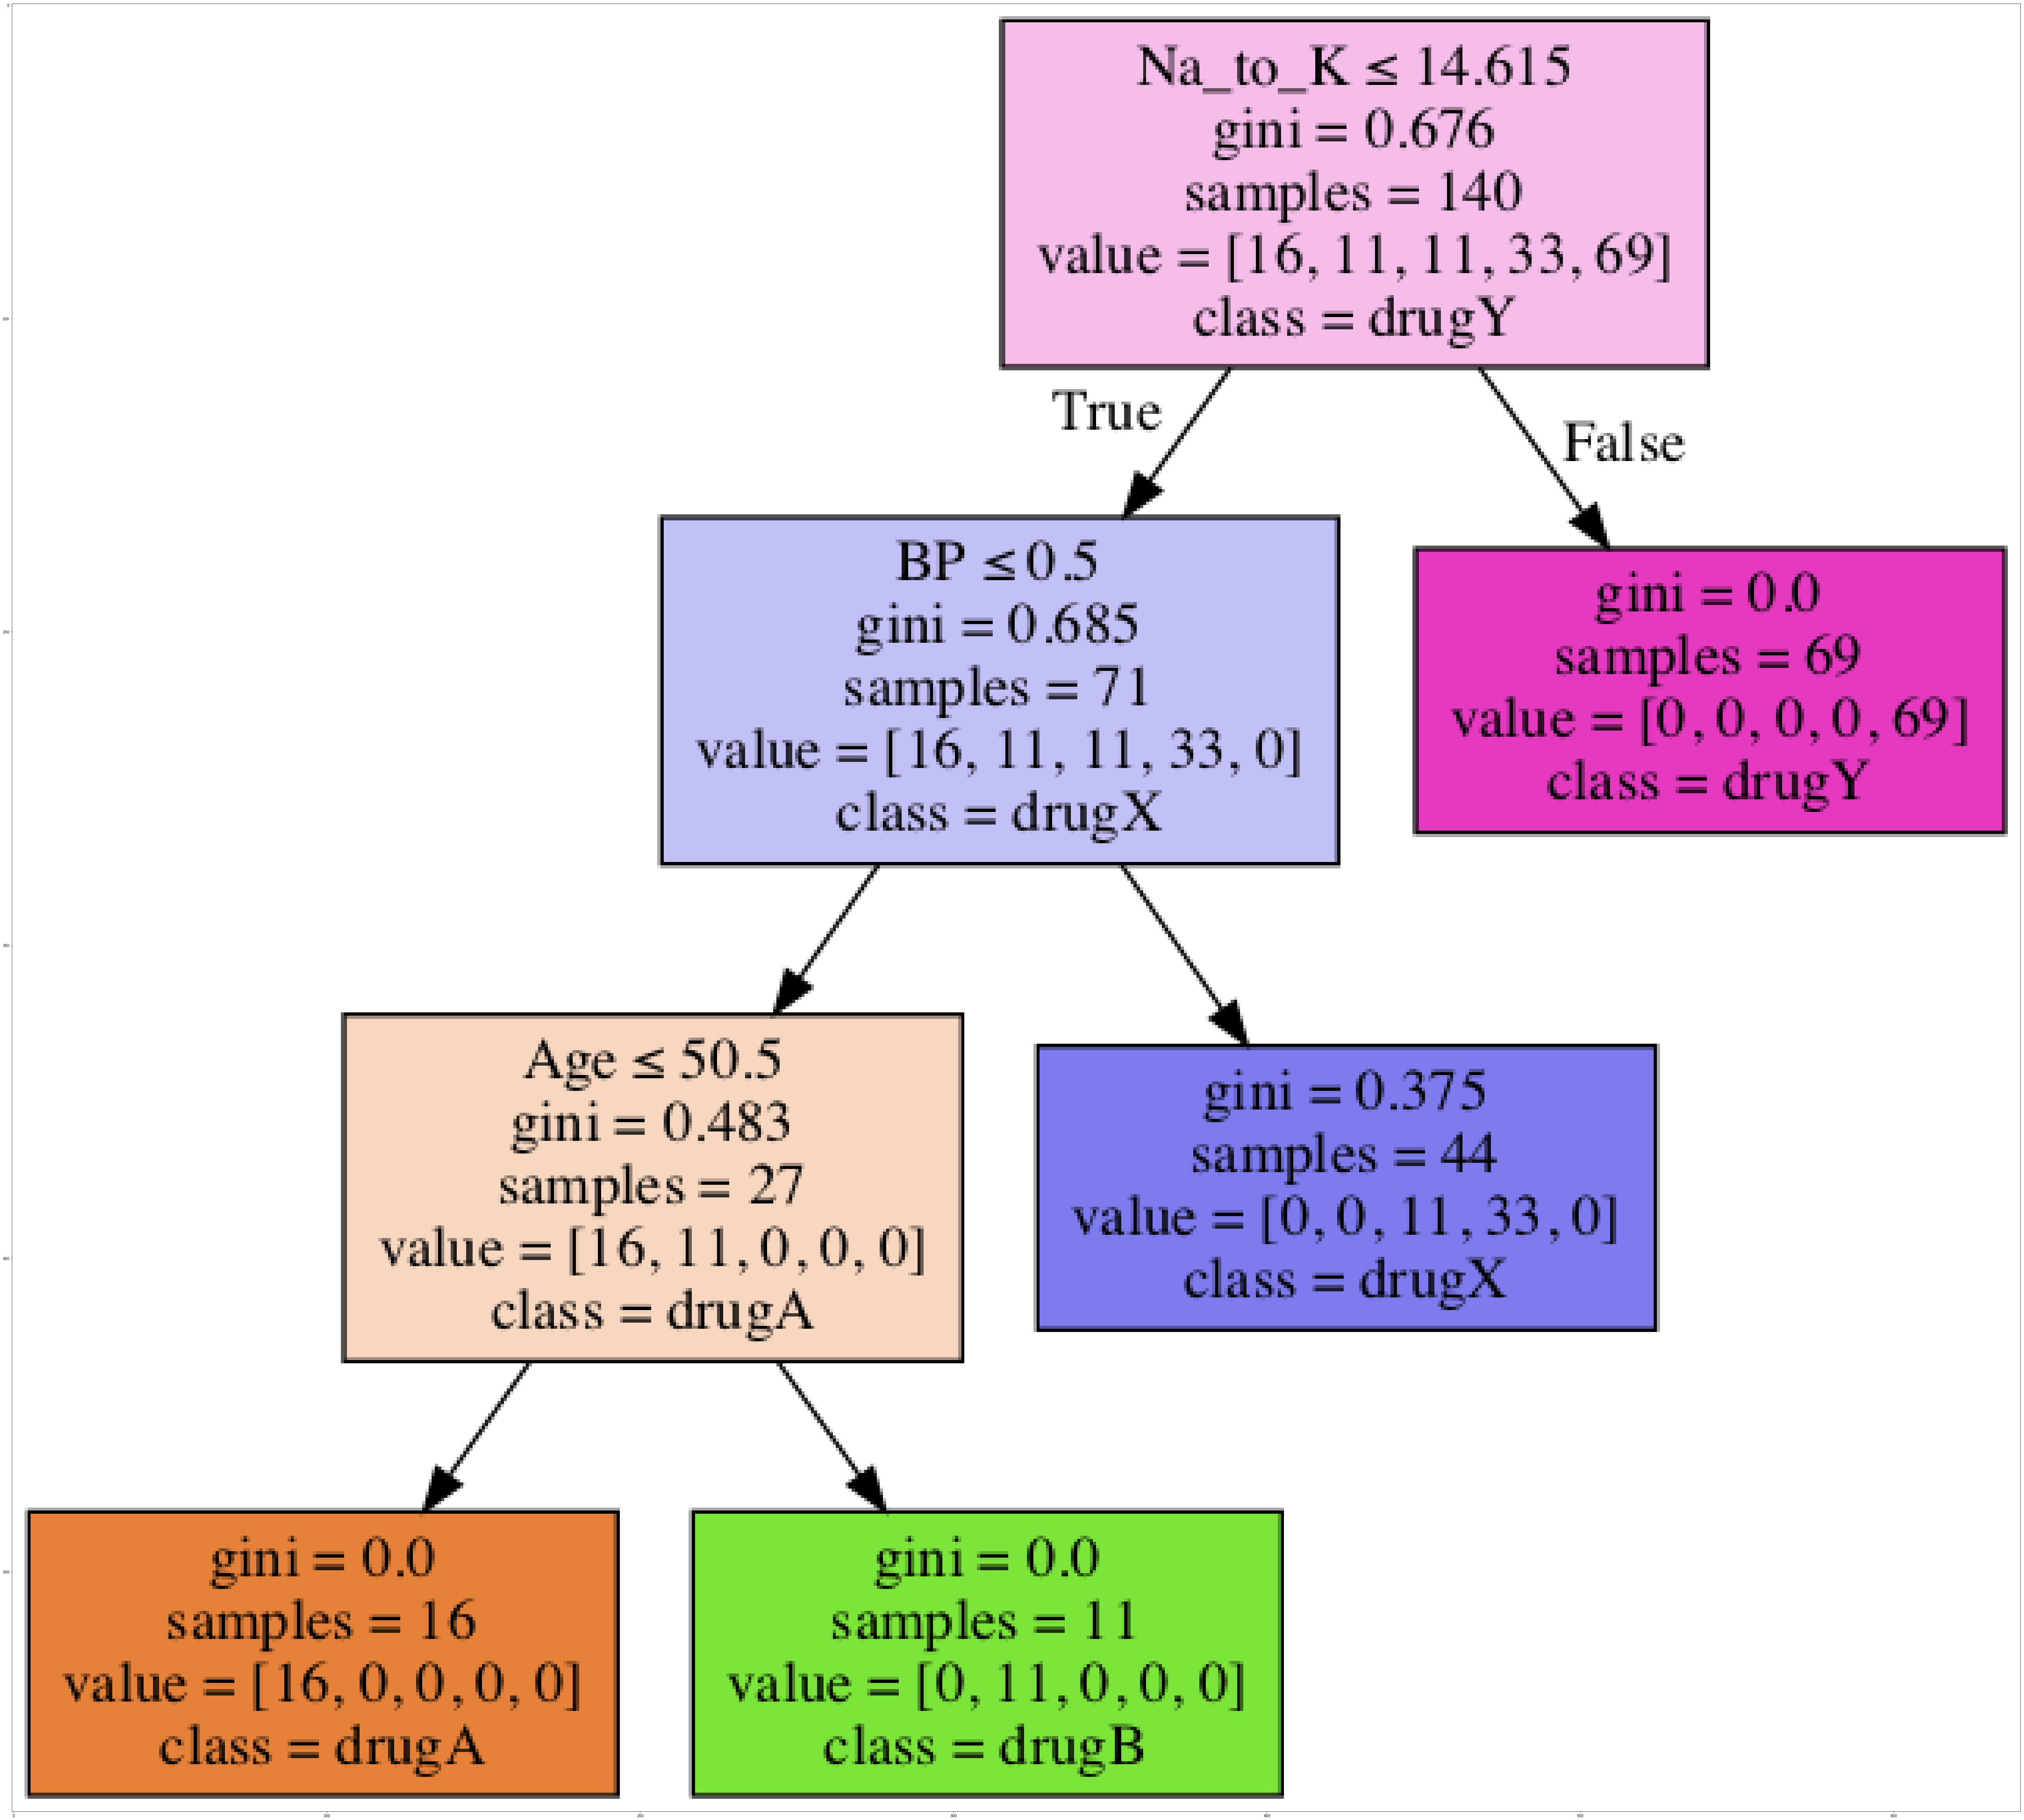

In [34]:
plt.clf
dot_data = StringIO()
filename = "drugtree2.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree2,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')



<h1><center>Neural Networks</center></h1>